In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling  import RandomUnderSampler

In [2]:
data = pd.read_csv('C:/Users/Srujan/Documents/Datasets/cross sell prediction/train.csv')
test = pd.read_csv('C:/Users/Srujan/Documents/Datasets/cross sell prediction/test.csv')
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
data.Response.value_counts()
#percentages of 1's and 0's in target variable
print(data.Response.value_counts()/data.shape[0] *100)

0    87.743664
1    12.256336
Name: Response, dtype: float64


In [5]:
data.drop('id',axis=1,inplace=True)
ID = test['id']
test.drop('id',axis=1,inplace=True)

In [6]:
print(data['Vehicle_Age'].value_counts(),test['Vehicle_Age'].value_counts())
print(data['Region_Code'].value_counts(),test['Region_Code'].value_counts())

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64 1-2 Year     66699
< 1 Year     55019
> 2 Years     5319
Name: Vehicle_Age, dtype: int64
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype

In [7]:
# To replace region code, summing the number of positive responses for each region code and transforming it into dictionary.
region_code = data.groupby(['Region_Code'])['Response'].sum().sort_values().to_dict()
policy_channel = data.groupby(['Policy_Sales_Channel'])['Response'].sum().sort_values().to_dict()

In [8]:
from sklearn.preprocessing import LabelEncoder 
l = LabelEncoder()
data['Gender'] = l.fit_transform(data['Gender'])
data['Vehicle_Age'] = l.fit_transform(data['Vehicle_Age'])
data['Vehicle_Damage'] = l.fit_transform(data['Vehicle_Damage'])
#data['Policy_Sales_Channel'] = l.fit_transform(data['Policy_Sales_Channel'])

test['Gender'] = l.fit_transform(test['Gender'])
test['Vehicle_Age'] = l.fit_transform(test['Vehicle_Age'])
test['Vehicle_Damage'] = l.fit_transform(test['Vehicle_Damage'])
test['Vehicle_Age'] = l.fit_transform(test['Vehicle_Age'])

In [9]:
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [10]:
#sns.pairplot(data)

In [11]:
data.corr()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,1.000000,0.145545,-0.018374,0.000604,-0.081932,-0.112625,0.091606,0.003673,-0.111159,-0.002517,0.052440
Age,0.145545,1.000000,-0.079782,0.042574,-0.254682,-0.522300,0.267534,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.018374,-0.079782,1.000000,-0.001081,0.014969,0.030173,-0.016622,-0.011906,0.043731,-0.000848,0.010155
Region_Code,0.000604,0.042574,-0.001081,1.000000,-0.024659,-0.027840,0.028235,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,-0.081932,-0.254682,0.014969,-0.024659,1.000000,0.174783,-0.824143,0.004269,0.219381,0.002537,-0.341170
Vehicle_Age,-0.112625,-0.522300,0.030173,-0.027840,0.174783,1.000000,-0.174238,0.023656,0.388551,0.002484,-0.104078
Vehicle_Damage,0.091606,0.267534,-0.016622,0.028235,-0.824143,-0.174238,1.000000,0.009349,-0.224377,-0.002064,0.354400
Annual_Premium,0.003673,0.067507,-0.011906,-0.010588,0.004269,0.023656,0.009349,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.111159,-0.577826,0.043731,-0.042420,0.219381,0.388551,-0.224377,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.002517,-0.001264,-0.000848,-0.002750,0.002537,0.002484,-0.002064,-0.000608,0.000002,1.000000,-0.001050


In [12]:
data['Region_Code'].replace(region_code,inplace=True)
data['Policy_Sales_Channel'].replace(policy_channel,inplace=True)

test['Region_Code'].replace(region_code,inplace=True)
test['Policy_Sales_Channel'].replace(policy_channel,inplace=True)
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,19917.0,0,2,1,40454.0,15891.0,217,1
1,1,76,1,1181.0,0,0,0,33536.0,15891.0,183,0
2,1,47,1,19917.0,0,2,1,38294.0,15891.0,27,1
3,1,21,1,1041.0,1,1,0,28619.0,3858.0,203,0
4,0,29,1,2224.0,1,1,0,27496.0,3858.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,187.0,1,0,0,30170.0,15891.0,88,0
381105,1,30,1,436.0,1,1,0,40016.0,3858.0,131,0
381106,1,21,1,900.0,1,1,0,35118.0,475.0,161,0
381107,0,68,1,422.0,0,2,1,44617.0,13996.0,74,0


In [13]:
# as you can see the correlation of region code with response has increased
data.corr()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,1.000000,0.145545,-0.018374,0.031857,-0.081932,-0.112625,0.091606,0.003673,0.129275,-0.002517,0.052440
Age,0.145545,1.000000,-0.079782,0.302234,-0.254682,-0.522300,0.267534,0.067507,0.464194,-0.001264,0.111147
Driving_License,-0.018374,-0.079782,1.000000,-0.016238,0.014969,0.030173,-0.016622,-0.011906,-0.028264,-0.000848,0.010155
Region_Code,0.031857,0.302234,-0.016238,1.000000,-0.179886,-0.180377,0.191132,0.310502,0.238795,0.000541,0.123192
Previously_Insured,-0.081932,-0.254682,0.014969,-0.179886,1.000000,0.174783,-0.824143,0.004269,-0.214989,0.002537,-0.341170
Vehicle_Age,-0.112625,-0.522300,0.030173,-0.180377,0.174783,1.000000,-0.174238,0.023656,-0.376759,0.002484,-0.104078
Vehicle_Damage,0.091606,0.267534,-0.016622,0.191132,-0.824143,-0.174238,1.000000,0.009349,0.227505,-0.002064,0.354400
Annual_Premium,0.003673,0.067507,-0.011906,0.310502,0.004269,0.023656,0.009349,1.000000,0.113904,-0.000608,0.022575
Policy_Sales_Channel,0.129275,0.464194,-0.028264,0.238795,-0.214989,-0.376759,0.227505,0.113904,1.000000,-0.000396,0.158624
Vintage,-0.002517,-0.001264,-0.000848,0.000541,0.002537,0.002484,-0.002064,-0.000608,-0.000396,1.000000,-0.001050


## Checking Outliers

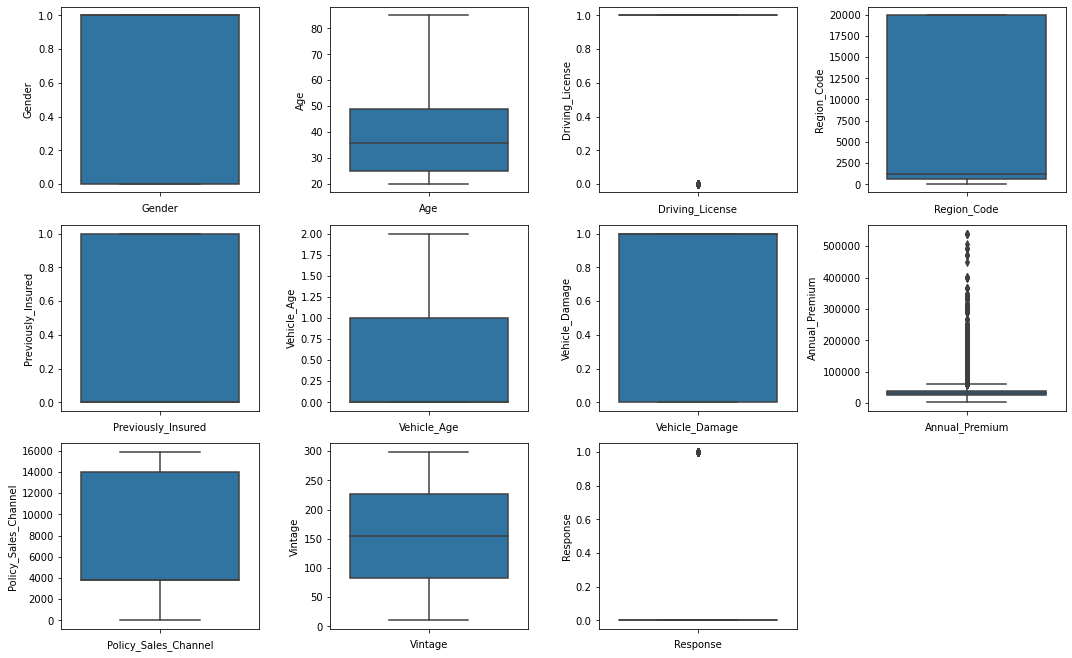

In [14]:
plt.figure(figsize=(15, 15))

for i, col in enumerate(data.columns,1):
    plt.subplot(5,4, i)
    sns.boxplot(y=col,data=data)
    plt.xlabel(col)
plt.tight_layout()

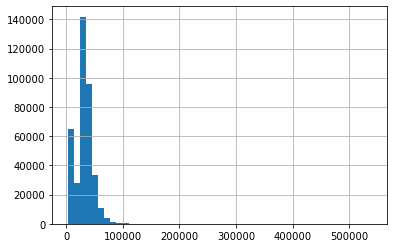

In [15]:
data['Annual_Premium'].hist(bins=50)

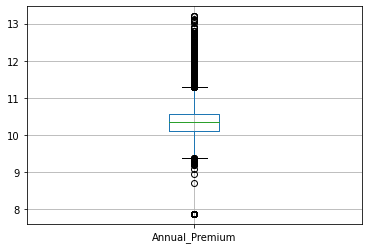

In [16]:
## Annual Premium has many ouliers so applying log transformation
data['Annual_Premium'] = np.log(data['Annual_Premium'])
test['Annual_Premium'] = np.log(test['Annual_Premium'])
data[['Annual_Premium']].boxplot()

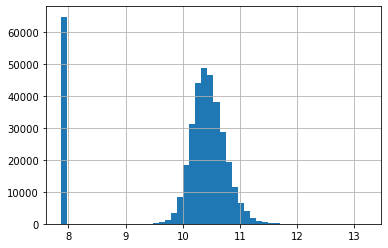

In [17]:
data['Annual_Premium'].hist(bins=50)

## Feature Scaling

In [18]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix
import xgboost

In [19]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

oversample = RandomOverSampler(sampling_strategy=0.5)
X, y = oversample.fit_resample(X, y)

print(X.shape)
scale = StandardScaler()
X = scale.fit_transform(X)
test = scale.transform(test)

(501598, 10)


In [20]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [21]:
from catboost import CatBoostClassifier, Pool

In [22]:
model = CatBoostClassifier(learning_rate=0.03,iterations=800,depth=6,
                           eval_metric='AUC',task_type="GPU",devices='0:1')

In [23]:
model.fit(X,
          y,
          eval_set=None,
          verbose=True)

0:	learn: 0.8413037	total: 118ms	remaining: 1m 34s
1:	learn: 0.8418100	total: 218ms	remaining: 1m 27s
2:	learn: 0.8440858	total: 327ms	remaining: 1m 26s
3:	learn: 0.8436769	total: 420ms	remaining: 1m 23s
4:	learn: 0.8444262	total: 507ms	remaining: 1m 20s
5:	learn: 0.8446379	total: 606ms	remaining: 1m 20s
6:	learn: 0.8453596	total: 715ms	remaining: 1m 20s
7:	learn: 0.8455106	total: 833ms	remaining: 1m 22s
8:	learn: 0.8457197	total: 936ms	remaining: 1m 22s
9:	learn: 0.8461190	total: 1.04s	remaining: 1m 21s
10:	learn: 0.8463483	total: 1.14s	remaining: 1m 21s
11:	learn: 0.8462004	total: 1.25s	remaining: 1m 21s
12:	learn: 0.8463003	total: 1.35s	remaining: 1m 21s
13:	learn: 0.8464303	total: 1.45s	remaining: 1m 21s
14:	learn: 0.8463583	total: 1.56s	remaining: 1m 21s
15:	learn: 0.8469875	total: 1.68s	remaining: 1m 22s
16:	learn: 0.8469335	total: 1.78s	remaining: 1m 22s
17:	learn: 0.8471614	total: 1.89s	remaining: 1m 21s
18:	learn: 0.8479969	total: 1.99s	remaining: 1m 21s
19:	learn: 0.8479606	t

In [24]:
model.get_feature_importance()

array([ 1.37760657, 16.45208242,  0.1345894 , 11.67365685, 37.71821316,
        2.16851976, 12.39195742,  4.14027295, 11.28226658,  2.6608349 ])

In [25]:
y_probs = model.predict_proba(test)
y_probs

array([[9.98079980e-01, 1.92002047e-03],
       [3.70590903e-01, 6.29409097e-01],
       [4.04840514e-01, 5.95159486e-01],
       ...,
       [9.99178186e-01, 8.21814099e-04],
       [9.99876398e-01, 1.23601920e-04],
       [9.93899537e-01, 6.10046342e-03]])

In [26]:
y_probs = y_probs[:,1]
sub_cat = pd.DataFrame({'id':ID,'Response':y_probs})
sub_cat.set_index('id',inplace=True)
sub_cat.to_csv('C:/Users/Srujan/Documents/Datasets/cross sell prediction/sub_cat1.csv')